In [3]:
import tensorflow as tf
import matplotlib.pylab as plt
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [4]:
CLASSIFIER_URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
IMG_SHAPE = 224

model = tf.keras.Sequential([
    hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))
])

In [5]:
import numpy as np
import PIL.Image as Image

In [34]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')

In [35]:
grace_hopper = Image.open(grace_hopper).resize((IMG_SHAPE, IMG_SHAPE))

In [36]:
img = np.array(grace_hopper) / 255.0
img.shape

(224, 224, 3)

In [38]:
tf.expand_dims(img, axis=0).shape

TensorShape([1, 224, 224, 3])

In [39]:
result = model.predict(tf.expand_dims(img, axis=0))

1/1 [==============================] - 0s 19ms/step


In [40]:
prediction_idx = np.argmax(result[0])
print(prediction_idx)
print(result[0][prediction_idx])

653
9.535999


In [27]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
open(labels_path)

10484/10484 [==============================] - 0s 0us/step


<_io.TextIOWrapper name='/root/.keras/datasets/ImageNetLabels.txt' mode='r' encoding='UTF-8'>

In [89]:
labels = np.array(open(labels_path).read().splitlines())
labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

In [41]:
img

array([[[0.09803922, 0.10980392, 0.32156863],
        [0.11372549, 0.12156863, 0.35686275],
        [0.10588235, 0.10980392, 0.37254902],
        ...,
        [0.28627451, 0.43529412, 0.7254902 ],
        [0.27058824, 0.41960784, 0.71372549],
        [0.2745098 , 0.42352941, 0.71764706]],

       [[0.10980392, 0.12156863, 0.33333333],
        [0.10588235, 0.11372549, 0.35294118],
        [0.10588235, 0.10980392, 0.36862745],
        ...,
        [0.30196078, 0.44705882, 0.73333333],
        [0.31764706, 0.4627451 , 0.74901961],
        [0.31372549, 0.45882353, 0.74509804]],

       [[0.10588235, 0.11764706, 0.32941176],
        [0.10980392, 0.11764706, 0.35294118],
        [0.11764706, 0.12156863, 0.38039216],
        ...,
        [0.33333333, 0.4745098 , 0.75294118],
        [0.31372549, 0.45882353, 0.7372549 ],
        [0.3254902 , 0.47058824, 0.74901961]],

       ...,

       [[0.62745098, 0.03921569, 0.09019608],
        [0.63137255, 0.05490196, 0.09411765],
        [0.59215686, 0

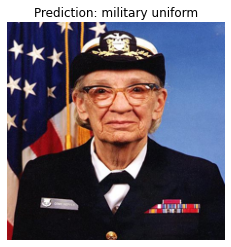

In [44]:
plt.imshow(img)
plt.axis('off')
_ = plt.title("Prediction: " + labels[prediction_idx])

In [45]:
(train_ds, val_ds), metadata = tfds.load('cats_vs_dogs', with_info=True, 
                                         as_supervised=True, split=['train[:80%]', 'train[80%:]'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteX8MR0D/cats_vs_dogs-train.tfrecord*...:   0%|    …

Dataset cats_vs_dogs downloaded and prepared to ~/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [53]:
num_train = metadata.splits['train'].num_examples
num_classes = metadata.features['label'].num_classes
print(num_train)
print(num_classes)

23262
2


In [55]:
for i, example_image in enumerate(train_ds.take(3)):
  print("Image {} shape: {}".format(i+1, example_image[0].shape))

Image 1 shape: (262, 350, 3)
Image 2 shape: (409, 336, 3)
Image 3 shape: (493, 500, 3)


In [61]:
def format_image(image, label):
  image = tf.image.resize(image, (IMG_SHAPE, IMG_SHAPE)) / 255.0
  return image, label

BATCH_SIZE = 32
train_batches = train_ds.shuffle(num_train // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = val_ds.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [69]:
for images, labels in train_batches.take(1):
  print(1)

1


In [71]:
image_batch, label_batch = next(iter(train_batches.take(1)))
print(label_batch)

tf.Tensor([1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0], shape=(32,), dtype=int64)


In [ ]:
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

In [79]:
result_batch = model.predict(image_batch)
result_batch

1/1 [==============================] - 0s 31ms/step


array([[ 0.23213771,  0.80621535,  0.3670959 , ...,  0.3842972 ,
        -0.42391893, -0.48452413],
       [ 0.14623997,  1.2599424 ,  1.2791855 , ...,  1.8025057 ,
         1.3021433 ,  2.51753   ],
       [ 0.22084484,  0.8605556 ,  0.02966255, ..., -1.0776504 ,
         1.0667799 ,  0.44761586],
       ...,
       [ 0.3012626 ,  0.9002621 , -0.45357722, ..., -1.184874  ,
         1.288092  ,  0.9944663 ],
       [ 0.1988762 ,  0.19642568,  0.0048888 , ..., -0.51042753,
         1.577395  ,  0.740062  ],
       [ 0.30632862,  0.6035512 , -0.25173992, ..., -0.09964679,
         1.2274616 ,  0.13840835]], dtype=float32)

In [83]:
np.argmax(result_batch, axis=-1)

array([236, 287, 286, 283, 282, 224, 286, 286, 247, 285, 168, 286, 286,
       228, 286, 286, 285, 286, 282, 208, 228, 243, 241, 163, 181, 286,
       175, 283, 282, 286, 286, 288])

In [90]:
predicted_class_names = labels[np.argmax(result_batch, axis=-1)]
print(predicted_class_names)

['German shepherd' 'cougar' 'Egyptian cat' 'tiger cat' 'tabby'
 'schipperke' 'Egyptian cat' 'Egyptian cat' 'Great Dane' 'Siamese cat'
 'English foxhound' 'Egyptian cat' 'Egyptian cat' 'kelpie' 'Egyptian cat'
 'Egyptian cat' 'Siamese cat' 'Egyptian cat' 'tabby' 'golden retriever'
 'kelpie' 'boxer' 'Appenzeller' 'beagle' 'American Staffordshire terrier'
 'Egyptian cat' 'Norwegian elkhound' 'tiger cat' 'tabby' 'Egyptian cat'
 'Egyptian cat' 'lynx']


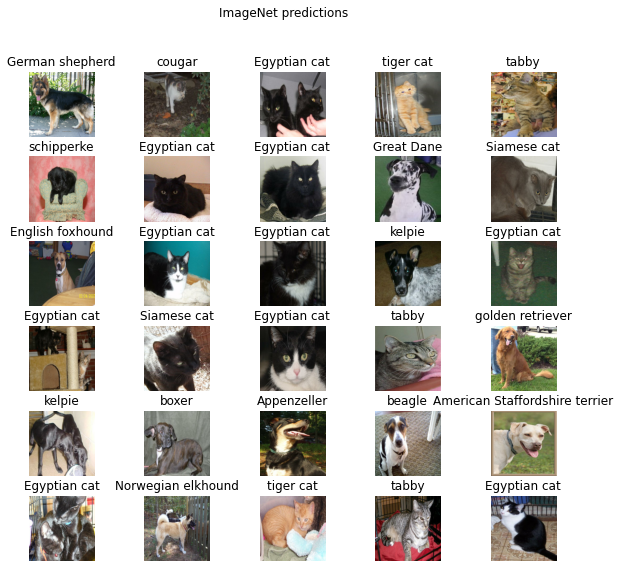

In [91]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [100]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
feature_extractor = hub.KerasLayer(URL, trainable=False)

In [101]:
# see the shape of the final layer
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [102]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(2, activation='softmax')
])

In [103]:
model.build([None, 224, 224, 3])

In [104]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

EPOCHS = 6
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


582/582 [==============================] - 42s 60ms/step - loss: 0.0568 - accuracy: 0.9804 - val_loss: 0.0330 - val_accuracy: 0.9888
Epoch 2/6
582/582 [==============================] - 39s 61ms/step - loss: 0.0305 - accuracy: 0.9896 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 3/6
582/582 [==============================] - 38s 59ms/step - loss: 0.0253 - accuracy: 0.9911 - val_loss: 0.0324 - val_accuracy: 0.9893
Epoch 4/6
582/582 [==============================] - 41s 63ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 5/6
582/582 [==============================] - 37s 57ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 6/6
582/582 [==============================] - 37s 57ms/step - loss: 0.0171 - accuracy: 0.9948 - val_loss: 0.0352 - val_accuracy: 0.9890


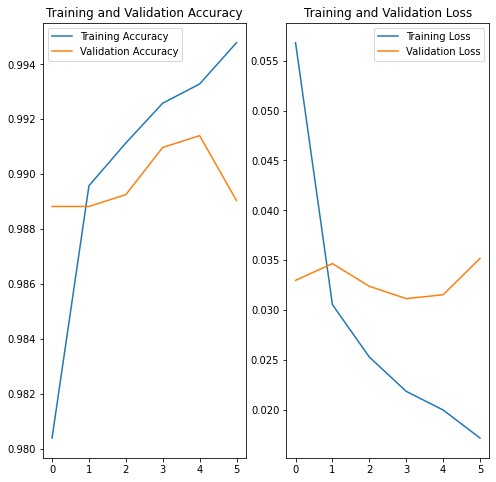

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# 1. validation perforamnce is measured at the end of the epochs but the training perforamnce is the 
#    average across the epoch
# 2. the pre-trained model applied image augmentation on trainning set but not on validation set

In [120]:
class_labels = np.array(metadata.features['label'].names)
class_labels

array(['cat', 'dog'], dtype='<U3')

In [121]:
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_labels[predicted_ids]
predicted_class_names

1/1 [==============================] - 0s 30ms/step


array(['dog', 'cat', 'cat', 'cat', 'cat', 'dog', 'cat', 'cat', 'dog',
       'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'cat', 'cat', 'cat',
       'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'cat', 'dog',
       'cat', 'cat', 'cat', 'cat', 'cat'], dtype='<U3')

In [122]:
print("Labels: ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:  [1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0]
Predicted labels:  [1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0]


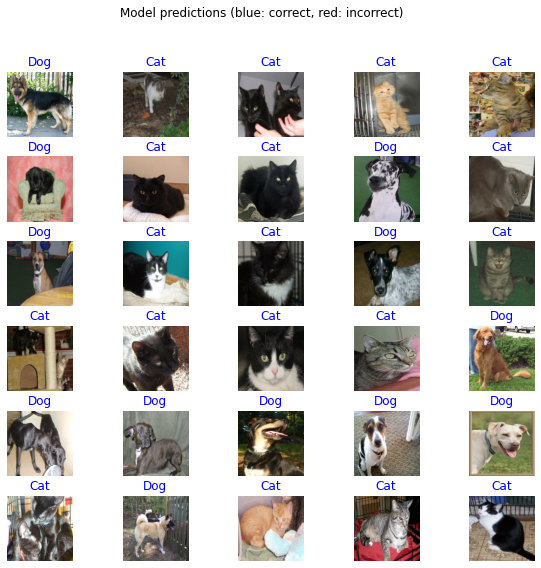

In [123]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image_batch[n])
  color = "blue" if predicted_ids[n] == label_batch[n] else "red"
  plt.title(predicted_class_names[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")